<a href="https://colab.research.google.com/github/purshottamkumarr/Supervised_Learning_Project/blob/main/Boston_Housing_Price_Predication(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
data = pd.read_csv("BostonHousing.csv")
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [ ]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


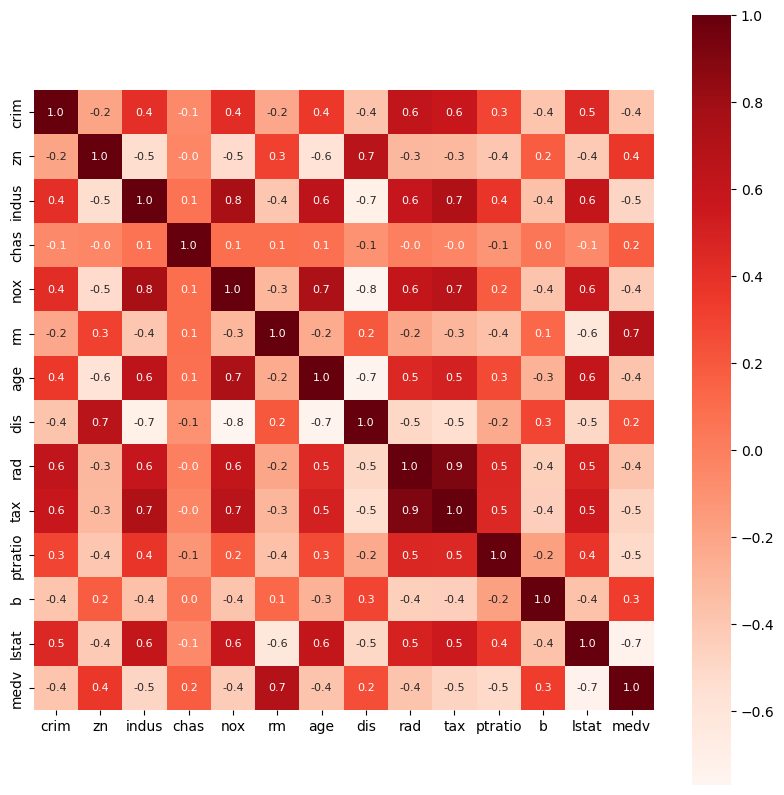

In [ ]:
correalation = data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(correalation,cbar = True,square = True,annot = True,annot_kws = {"size":8},fmt = "0.1f",cmap ="Reds");

In [ ]:
x = data.drop(columns = "medv",axis = 1)
y = data["medv"]

print(x)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [ ]:
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(506, 13) (455, 13) (51, 13)


In [ ]:
model = XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
## Predication on the training Data
train_prediction = model.predict(x_train)
print(train_prediction)

[30.7094     4.999579  35.372982  27.89421   18.42249   18.527628
 17.554571  15.590106  22.412603  20.313229  20.599707  19.768137
 28.201643  35.111416  27.450188  48.53808   27.503033  11.477075
 22.021545  13.229441   7.4044037 20.584524  20.093977  25.134907
 22.022652  19.169003  24.261457  19.385864  23.88968   34.90242
 19.406368  21.388163  26.613075  37.612015  35.998     21.36727
 23.593754  24.812717  19.912708  20.87663   18.240324  10.892076
 43.985332  43.50398    8.315024  46.687614  32.90496   21.723122
 14.377953  29.0998    23.781677  23.16092   21.044315  20.096893
 34.69643   13.899195  13.494154  22.006     15.189533  10.907934
 22.710798  13.818946   5.621524  29.819365  49.999542  34.893967
 20.597616  23.357647  19.176277  32.6915    19.59549   26.999613
  8.400194  46.00072   21.64505   27.039272  19.38555   19.302269
 24.805767  22.617117  31.690977  18.555689   8.7029    17.431757
 23.70716   13.275693  10.515883  12.644112  25.009272  19.672798
 14.9006405 

In [ ]:
error_score = metrics.r2_score(y_train,train_prediction)
print(error_score)

## R Squre Error

0.999992795719156


In [ ]:
## Meaan Squre Error

mean_squre_error = metrics.mean_absolute_error(y_train,train_prediction)

print(mean_squre_error)

0.017555835220839963


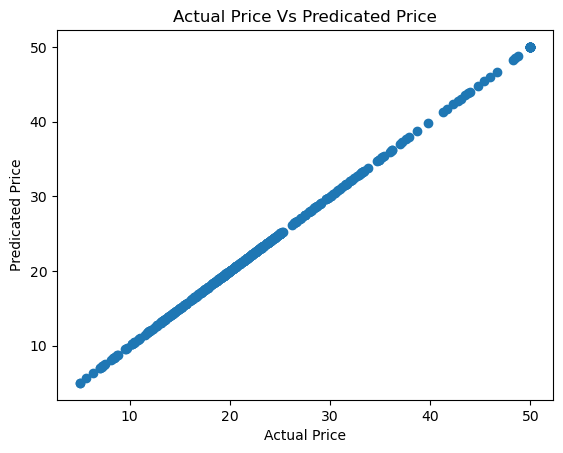

In [ ]:
## Visualising the Data

plt.scatter(y_train,train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicated Price")
plt.title("Actual Price Vs Predicated Price");